<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas 결측값 처리

* 결측값(missing value) 및 결측치는 값이 있어야 할 곳에 값이 존재하지 않는 것을 의미
* 결측값은 사측연산이 안되기 때문에 분석에 오류를 발생시키거나 알고리즘 자체를 실행시키지 못하는 원인
*  따라서 데이터를 수집했다면 우선적으로 결측값(missing value) 여부를 확인하고 이에 대한 조치가 필요

#### pandas에서 결측값

* 값이 없다고 입력할 때 비워두는 것이 아니라 'None'을 입력(ex: [1, 2, 3, None, 5])
* numpy에서 결측값을 입력하는 np.nan을 이용(ex: [1, 2, 3, np.nan, 5] .

#### 결측값 처리 메서드

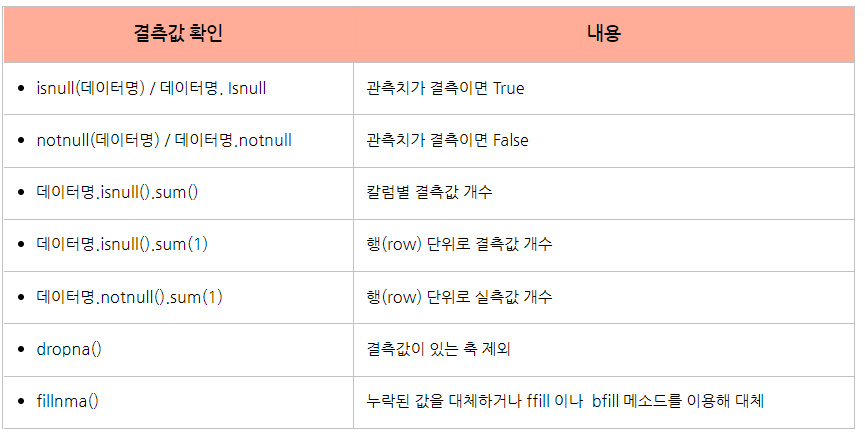




* 결측치가 있는 데이터 생성

In [ ]:
import pandas as pd
import numpy as np

data = {"names": ["손흥민", "메시", "호날도", "살라", "네이마르"],
        "year": [int(2019), int(2010), np.nan, int(2015), int(2004)],
        "salary": [3.5, None, 4.6, None, 3.9]}
df = pd.DataFrame(data)
df



,names,year,salary
0,손흥민,2019.0,3.5
1,메시,2010.0,NaN
2,호날도,NaN,4.6
3,살라,2015.0,NaN
4,네이마르,2004.0,3.9


* 결측치 확인

In [ ]:
df.isnull().sum()

names     0
year      1
salary    2
dtype: int64

#### 결측치 처리 방식

* 결측값이 행이나 칼럼을 제거하는 방식
* 결측값을 다른 값으로 대체하는 방식

In [ ]:
df.dropna(axis=0)

,names,year,salary
0,손흥민,2019.0,3.5
4,네이마르,2004.0,3.9


In [ ]:
df.dropna(axis=1)

,names
0,손흥민
1,메시
2,호날도
3,살라
4,네이마르


In [ ]:
df.dropna(subset=['year'])

,names,year,salary
0,손흥민,2019.0,3.5
1,메시,2010.0,NaN
3,살라,2015.0,NaN
4,네이마르,2004.0,3.9


In [ ]:
df.dropna(how='all')

,names,year,salary
0,손흥민,2019.0,3.5
1,메시,2010.0,NaN
2,호날도,NaN,4.6
3,살라,2015.0,NaN
4,네이마르,2004.0,3.9


* 결측값 제거

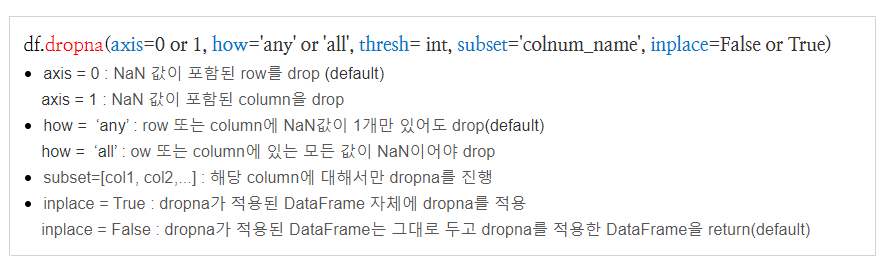

* 결측값 대체

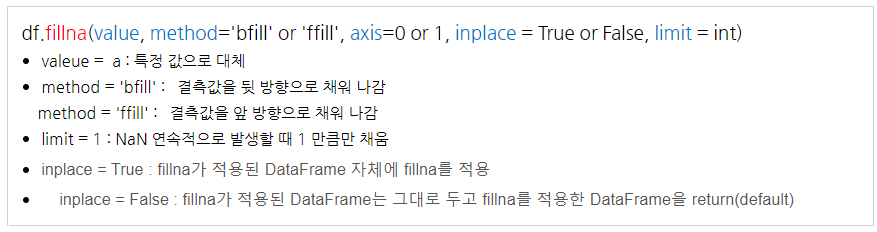

In [ ]:
df

,names,year,salary
0,손흥민,2019.0,3.5
1,메시,2010.0,NaN
2,호날도,NaN,4.6
3,살라,2015.0,NaN
4,네이마르,2004.0,3.9


In [ ]:
df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,names,year,salary
0,손흥민,2019.0,3.5
1,메시,2010.0,4.0
2,호날도,2012.0,4.6
3,살라,2015.0,4.0
4,네이마르,2004.0,3.9


## 중복 처리

* 웹에서 댓글 등을 크롤링하다보면 복붙(복사 & 붙여넣기)을 하는 사람들이 많아서 같은 아이디와 같은 내용이 다수 포함됨.
*이러한 데이터는 하나로 취급해야 하기 때문에 중복을 제거해 줌.

* 데이터프래임에서 중복이 있는지 확인하는 함수는 duplicated()
* 중복값을 제거하는 함수는 drop_duplicaites()

In [ ]:
df.loc[5] = ['손흥민',2019,3.5]
df

,names,year,salary
0,손흥민,2019.0,3.5
1,메시,2010.0,NaN
2,호날도,NaN,4.6
3,살라,2015.0,NaN
4,네이마르,2004.0,3.9
5,손흥민,2019.0,3.5


In [ ]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,names,year,salary
0,손흥민,2019.0,3.5
1,메시,2010.0,NaN
2,호날도,NaN,4.6
3,살라,2015.0,NaN
4,네이마르,2004.0,3.9


## 데이터프레임 연산함수 정렬(sort) 및 랭크(rank) 함수

* 파이썬 데이터에서 사용하는 범용 연산자를 데이터프레임에서도 그대로 사용
* 데이터프레임의 경우 같은 index와 같은 column 명끼리만 연산
* 한쪽에라도 데이터가 비어 있는 NaN이 있으면 계산이 불가능하기 때문에 NaN로 반환

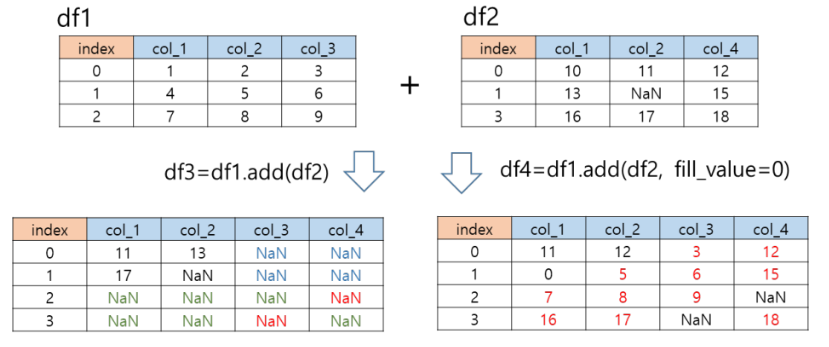

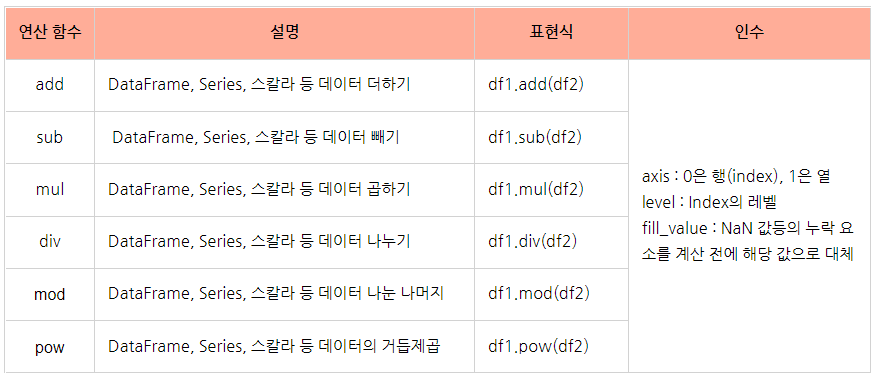

In [ ]:
df1 = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]],
                   columns = ['col_1', 'col_2', 'col_3'])

df2 = pd.DataFrame([[10, 11, 12], [13, np.nan, 15], [16, 17, 18]],
                   columns = ['col_1', 'col_2', 'col_4'],
                   index = [0, 1, 3])

df3 = df1.add(df2)
df3




,col_1,col_2,col_3,col_4
0,11.0,13.0,NaN,NaN
1,17.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [ ]:
df4 = df1.add(df2, fill_value=0)
df4

,col_1,col_2,col_3,col_4
0,11.0,13.0,3.0,12.0
1,17.0,5.0,6.0,15.0
2,7.0,8.0,9.0,NaN
3,16.0,17.0,NaN,18.0


#### 데이터프레임 정렬(sort)

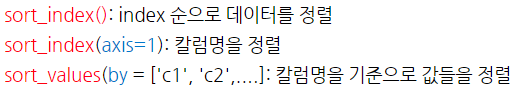

In [ ]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                  index = [2, 3, 1, 3],
                  columns = list('BDAC'))
df



,B,D,A,C
2,7,7,4,8
3,8,7,4,2
1,3,3,7,4
3,4,1,8,4


In [ ]:
df.sort_index()

,B,D,A,C
1,3,3,7,4
2,7,7,4,8
3,8,7,4,2
3,4,1,8,4


In [ ]:
df.sort_index(axis=1)

,A,B,C,D
2,4,7,8,7
3,4,8,2,7
1,7,3,4,3
3,8,4,4,1


In [ ]:
df.sort_values(by=['A'])

,B,D,A,C
2,7,7,4,8
3,8,7,4,2
1,3,3,7,4
3,4,1,8,4


#### 데이터프레임에서 순위 rank 함수

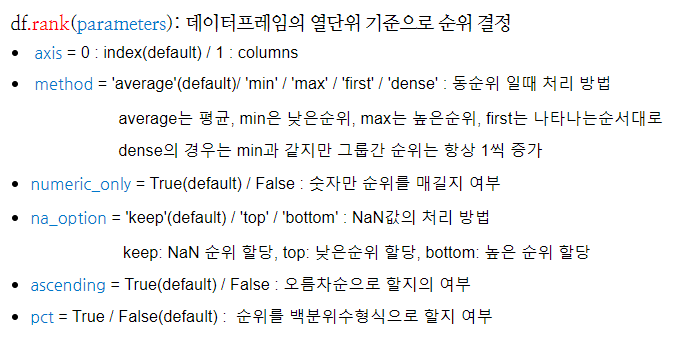

In [ ]:
생략